### 전처리, 시각화 프로젝트 ( 3시 반까지 제출! )
> 생각했던 가설 설정, 상관관계 도출 => 관계가 있는가 없는가 


1. 주제 선정
- 주제 선정 이유
- 데이터 셋
- 전처리 과정과 시각화 결과
- 이를 통해 도출할 수 있었던 내용

### 주제선정
> 분류에 따른 스트레스 체감도를 알아보기
- 소득에 따른 스트레스 체감도
- 학력에 따른 스트레스 체감도
- 기타 등등
 

### 선정이유
> 소득이 많으면 금전적 압박을 받지 않아 여유로울 것이고, <br>
여유로우면 스트레스를 받지 않을 것이라 생각해서<br>
그 사실을 확인하고 싶어 선정하게 되었음

### 데이터 셋
> 서울시 스트레스 체감도 통계.tsv

### 전처리 과정과 시각화 결과

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [65]:
seoul = pd.read_csv('report.tsv', sep='\t')

In [66]:
seoul.head(10)

,기간,대분류,분류,전혀 느끼지 않았다,느끼지 않은 편이다,보통이다,느낀 편이다,매우 많이 느꼈다,평균(10점)
0,2019,서울시,서울시,1.8,24.8,34.0,28.5,10.8,5.54
1,2019,성별,남자,2.0,24.5,33.2,28.9,11.4,5.58
2,2019,성별,여자,1.7,25.2,34.6,28.1,10.4,5.51
3,2019,연령별,10대,2.0,22.0,34.7,27.8,13.7,5.73
4,2019,연령별,20대,2.3,26.4,32.2,27.8,11.3,5.49
5,2019,연령별,30대,1.7,22.4,34.8,30.6,10.6,5.65
6,2019,연령별,40대,1.5,22.7,35.2,29.8,10.8,5.64
7,2019,연령별,50대,1.6,24.2,35.0,28.3,11.0,5.57
8,2019,연령별,60대 이상,2.1,28.1,32.9,26.8,10.1,5.37
9,2019,학력별,중졸 이하,2.3,27.9,30.3,28.1,11.4,5.46


In [67]:
seoul.drop('기간', axis=1, inplace=True)

In [69]:
seoul.head()

,대분류,분류,전혀 느끼지 않았다,느끼지 않은 편이다,보통이다,느낀 편이다,매우 많이 느꼈다,평균(10점)
0,서울시,서울시,1.8,24.8,34.0,28.5,10.8,5.54
1,성별,남자,2.0,24.5,33.2,28.9,11.4,5.58
2,성별,여자,1.7,25.2,34.6,28.1,10.4,5.51
3,연령별,10대,2.0,22.0,34.7,27.8,13.7,5.73
4,연령별,20대,2.3,26.4,32.2,27.8,11.3,5.49


In [ ]:
'''
category - 대분류
part - 분류
disagree - 전혀 아니다
no - 아니다
normal - 보통
yes - 그렇다
agree - 매우 그렇다
avg - 평균(10점기준) -> 높을수록 스트레스지수가 높다
'''

In [70]:
seoul.columns=['category','part','disagree','no','normal','yes','agree','avg']

In [128]:
seoul

,category,part,disagree,no,normal,yes,agree,avg
0,서울시,서울시,1.8,24.8,34.0,28.5,10.8,5.54
1,성별,남자,2.0,24.5,33.2,28.9,11.4,5.58
2,성별,여자,1.7,25.2,34.6,28.1,10.4,5.51
3,연령별,10대,2.0,22.0,34.7,27.8,13.7,5.73
4,연령별,20대,2.3,26.4,32.2,27.8,11.3,5.49
5,연령별,30대,1.7,22.4,34.8,30.6,10.6,5.65
6,연령별,40대,1.5,22.7,35.2,29.8,10.8,5.64
7,연령별,50대,1.6,24.2,35.0,28.3,11.0,5.57
8,연령별,60대 이상,2.1,28.1,32.9,26.8,10.1,5.37
9,학력별,중졸 이하,2.3,27.9,30.3,28.1,11.4,5.46


In [129]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  52 non-null     object 
 1   part      52 non-null     object 
 2   disagree  52 non-null     float64
 3   no        52 non-null     float64
 4   normal    52 non-null     float64
 5   yes       52 non-null     float64
 6   agree     52 non-null     float64
 7   avg       52 non-null     float64
dtypes: float64(6), object(2)
memory usage: 3.4+ KB


In [ ]:
#그룹별로 묶기

In [73]:
v = seoul.groupby('category')

In [74]:
v.groups

{'서울시': Int64Index([0], dtype='int64'),
 '성별': Int64Index([1, 2], dtype='int64'),
 '소득별': Int64Index([13, 14, 15, 16, 17, 18], dtype='int64'),
 '연령별': Int64Index([3, 4, 5, 6, 7, 8], dtype='int64'),
 '지역대분류': Int64Index([22, 23, 24, 25, 26], dtype='int64'),
 '지역소분류': Int64Index([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
             44, 45, 46, 47, 48, 49, 50, 51],
            dtype='int64'),
 '학력별': Int64Index([9, 10, 11, 12], dtype='int64'),
 '혼인상태별': Int64Index([19, 20, 21], dtype='int64')}

In [76]:
income = v.get_group('소득별')
income

,category,part,disagree,no,normal,yes,agree,avg
13,소득별,100만원 미만,1.7,30.7,23.6,27.1,16.9,5.67
14,소득별,100-200만원 미만,1.2,24.6,29.8,31.1,13.3,5.76
15,소득별,200-300만원 미만,1.8,26.9,33.8,26.3,11.3,5.46
16,소득별,300-400만원 미만,2.2,24.7,35.2,27.7,10.2,5.47
17,소득별,400-500만원 미만,1.4,25.3,35.3,28.2,9.9,5.50
18,소득별,500만원 이상,2.0,23.7,34.7,29.2,10.4,5.56


In [77]:
edu = v.get_group('학력별')
edu

,category,part,disagree,no,normal,yes,agree,avg
9,학력별,중졸 이하,2.3,27.9,30.3,28.1,11.4,5.46
10,학력별,고졸 이하,1.6,24.6,34.6,27.6,11.6,5.58
11,학력별,대졸 이하,1.9,24.2,34.6,29.1,10.2,5.54
12,학력별,대학원 이상,1.9,27.6,29.9,28.2,12.4,5.54


In [78]:
age = v.get_group('연령별')
age

,category,part,disagree,no,normal,yes,agree,avg
3,연령별,10대,2.0,22.0,34.7,27.8,13.7,5.73
4,연령별,20대,2.3,26.4,32.2,27.8,11.3,5.49
5,연령별,30대,1.7,22.4,34.8,30.6,10.6,5.65
6,연령별,40대,1.5,22.7,35.2,29.8,10.8,5.64
7,연령별,50대,1.6,24.2,35.0,28.3,11.0,5.57
8,연령별,60대 이상,2.1,28.1,32.9,26.8,10.1,5.37


In [79]:
sex = v.get_group('성별')
sex

,category,part,disagree,no,normal,yes,agree,avg
1,성별,남자,2.0,24.5,33.2,28.9,11.4,5.58
2,성별,여자,1.7,25.2,34.6,28.1,10.4,5.51


In [80]:
marriage = v.get_group('혼인상태별')
marriage

,category,part,disagree,no,normal,yes,agree,avg
19,혼인상태별,기혼,1.7,25.6,35.3,27.9,9.5,5.45
20,혼인상태별,미혼,2.0,23.3,32.7,29.6,12.4,5.68
21,혼인상태별,이혼/사별/기타,2.1,24.8,30.7,28.8,13.6,5.68


In [81]:
local = v.get_group('지역소분류')
local

,category,part,disagree,no,normal,yes,agree,avg
27,지역소분류,종로구,0.6,19.4,44.3,25.4,10.3,5.63
28,지역소분류,중구,0.5,23.9,27.1,39.6,8.9,5.81
29,지역소분류,용산구,0.6,19.0,36.4,30.0,14.0,5.95
30,지역소분류,성동구,2.4,27.3,41.0,18.8,10.5,5.19
31,지역소분류,광진구,1.1,22.8,25.9,29.8,20.3,6.14
32,지역소분류,동대문구,2.1,24.5,30.4,25.6,17.4,5.79
33,지역소분류,중랑구,2.3,20.4,40.6,26.2,10.5,5.55
34,지역소분류,성북구,2.5,28.9,29.6,30.4,8.6,5.35
35,지역소분류,강북구,4.4,28.7,36.2,25.2,5.6,4.97
36,지역소분류,도봉구,2.3,20.7,25.4,35.6,16.0,6.06


In [143]:
loc = v.get_group('지역대분류')
loc

,category,part,disagree,no,normal,yes,agree,avg
22,지역대분류,도심권,0.6,20.3,36.5,31.0,11.6,5.82
23,지역대분류,동북권,2.4,25.5,34.2,26.5,11.4,5.47
24,지역대분류,서북권,1.4,21.9,35.1,33.4,8.2,5.63
25,지역대분류,서남권,1.6,26.8,34.9,25.6,11.1,5.45
26,지역대분류,동남권,1.9,23.8,30.9,32.5,11.0,5.67


In [112]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeTwoSym',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'cmsy10',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'cmr10',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXGeneral',
 'cmex10',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'cmb10',
 'cmtt10',
 'STIXNonUnicode',
 'cmss10',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'DejaVu Sans',
 'cmmi10',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'Impact',
 'Trebuchet MS',
 'HyhwpEQ',
 'Segoe UI Emoji',
 'Segoe UI Symbol',
 'Microsoft Sans Serif',
 'Nirmala UI',
 'Wingdings 3',
 'Microsoft PhagsPa',
 'HCR Dotum',
 'Webdings',
 'Constantia',
 'Bahnschrift',
 'Sitka Small',
 'Times New Roman',
 'Yu Gothic',
 'Microsoft Tai Le',
 'Nirmala UI',
 'Times New Roman',
 'Courier New',
 'Luc

In [113]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [114]:
from matplotlib import font_manager
font_manager._rebuild()

In [108]:
sns.set(style='darkgrid')

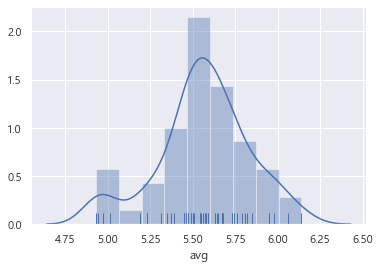

In [136]:
# 서울시 스트레스 평균 점수의 분포도 
# 5.5 ~ 5.75 부근이 밀도가 높은 것을 알 수 있음
sns.distplot(seoul['avg'], rug = True)

### 각 분류별 그래프

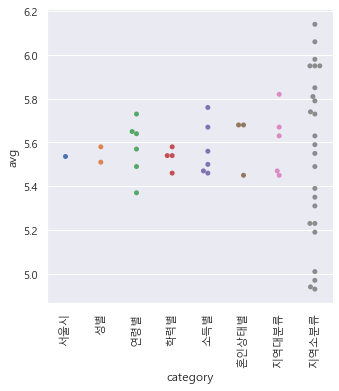

In [166]:
sns.catplot(x='category', y='avg', data=seoul, kind='swarm')
plt.xticks(rotation=90)
plt.show()

## 가설1
> 소득이 높으면 스트레스를 적게 받을 것이다.


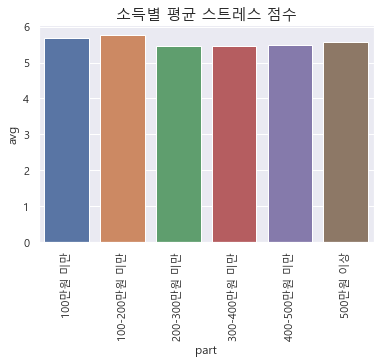

In [185]:
plt.xticks(rotation=90)
plt.title('소득별 평균 스트레스 점수', fontsize=15)
sns.barplot(x='part', y='avg', data=income)
plt.show()

> avg는 스트레스 평균 점수(10점)로 값이 클수록 스트레스가 크다는 것이다.<br>
스트레스 평균 점수는 __소득 100-200만 원 미만이 제일 높고,__ <br> 
__소득 200-300만 원 미만이 제일 낮은 수치__임을 알 수 있다.<br>
이를 미루어 보았을 때 가설과는 다른 결과가 도출된 것을 알 수 있다.<br>
<br>
__또한,__<br>
소득이 높다고 해서 무조건 스트레스가 적다고 할 순 없으나,<br>
200만 원 미만까지 두 개의 범위가 높은 avg를 가지고 있음으로 보아,<br>
__`평균적으로 소득이 낮으면 스트레스를 많이 받는다`__는 유추를 할 수 있다.<br>

* 영향을 미치는 다른 변수가 있을 수 있으며, 논리적인 데이터는 아님


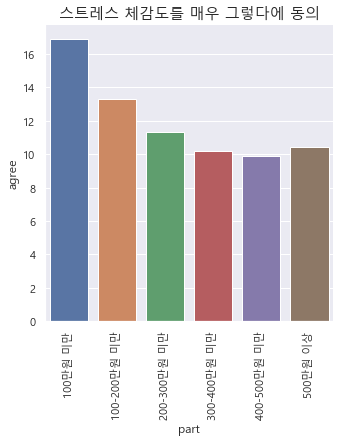

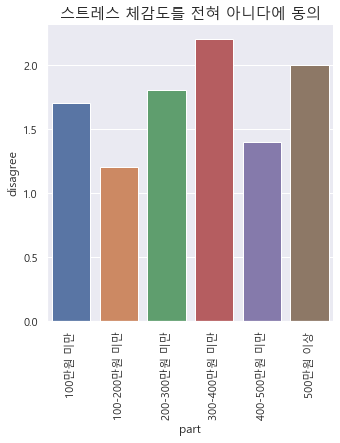

In [190]:
sns.catplot(x='part', y='agree', data=income, kind='bar')
plt.title('스트레스 체감도를 매우 그렇다에 동의', fontsize=15)
plt.xticks(rotation=90)
plt.show()

sns.catplot(x='part', y='disagree', data=income, kind='bar')
plt.xticks(rotation=90)
plt.title('스트레스 체감도를 전혀 아니다에 동의', fontsize=15)
plt.show()

### 스트레스 체감도 - 매우 그렇다에 동의
> __소득 100만 원 미만이 가장 높은 값__을 가지며,<br>
그 이후 소득부터는 계단식으로 값이 낮아지는 것을 볼 수 있다.<br>
그러나, __소득 500만 원 이상부터는 값이 다시 높아진 것__을 확인할 수 있다.
### 스트레스 체감도 - 전혀 아니다에 동의
> 소득 100-200만 원 미만이 가장 낮은 값을 가지며, <br>
소득 300-400만 원 미만이 가장 높은 값을 가진다.<br>




__소득이 높을수록 스트레스를 덜 받는다__라는 가설보다<br>
__`소득이 낮을수록 스트레스를 많이 받는다`__라는 가설이 좀 더 논리적으로 가까운 결론이 나왔다.

<hr>

## 가설2
> 고학력일수록 스트레스를 많이 받을 것이다.


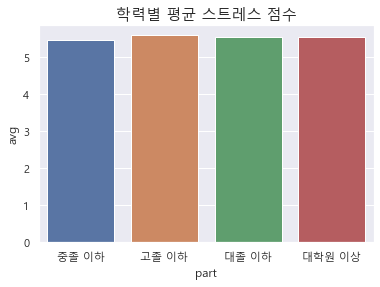

In [186]:
sns.barplot(x='part', y='avg', data=edu)
plt.title('학력별 평균 스트레스 점수', fontsize=15)
plt.show()

> 스트레스 평균 점수는<br>
고졸 이하의 학력이 가장 높은 값을 가지며,<br>
중졸 이하의 학력이 가장 낮은 값을 가진다.

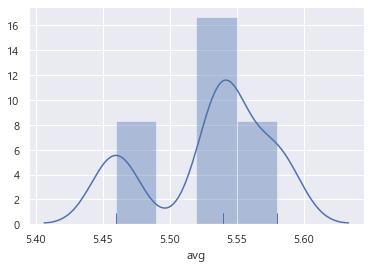

In [167]:
sns.distplot(edu['avg'], rug = True)
plt.show()

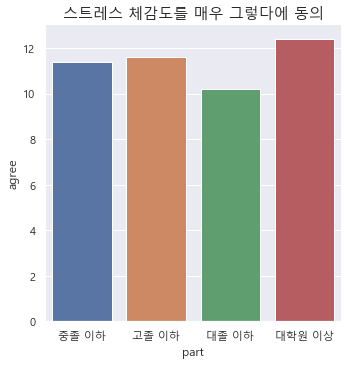

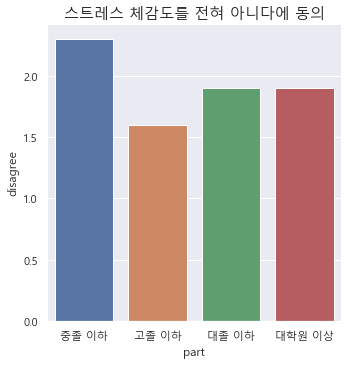

In [191]:
sns.catplot(x='part', y='agree', data=edu, kind='bar')
plt.title('스트레스 체감도를 매우 그렇다에 동의', fontsize=15)
plt.show()

sns.catplot(x='part', y='disagree', data=edu, kind='bar')
plt.title('스트레스 체감도를 전혀 아니다에 동의', fontsize=15)
plt.show()

> 스트레스 체감도를 매우 그렇다에 동의한 학력 중<br> 
대학원 이상을 가진 학력이 가장 높으며<br>
대졸 이하의 학력이 가장 낮은 수치를 기록하였다.<br>
<br>
그리고,<br>
스트레스 체감도를 전혀 아니다에 동의한 학력 중<br>
중졸 이하의 학력이 가장 높으며 고졸 이하의 학력이<br>
가장 낮은 수치를 기록하였다.

### 위의 결과들로 미루어 보았을 때
> 대학원 이상의 학력을 가진 사람은 스트레스를 많이 받고,<br>
중졸 이하의 학력을 가진 사람은 스트레스를 덜 받는다고 유추할 수 있겠지만,<br>
그 사이의 학력에는 일정한 규칙이 없어 고학력일수록 스트레스를 받는다고 결론내릴 수가 없다.

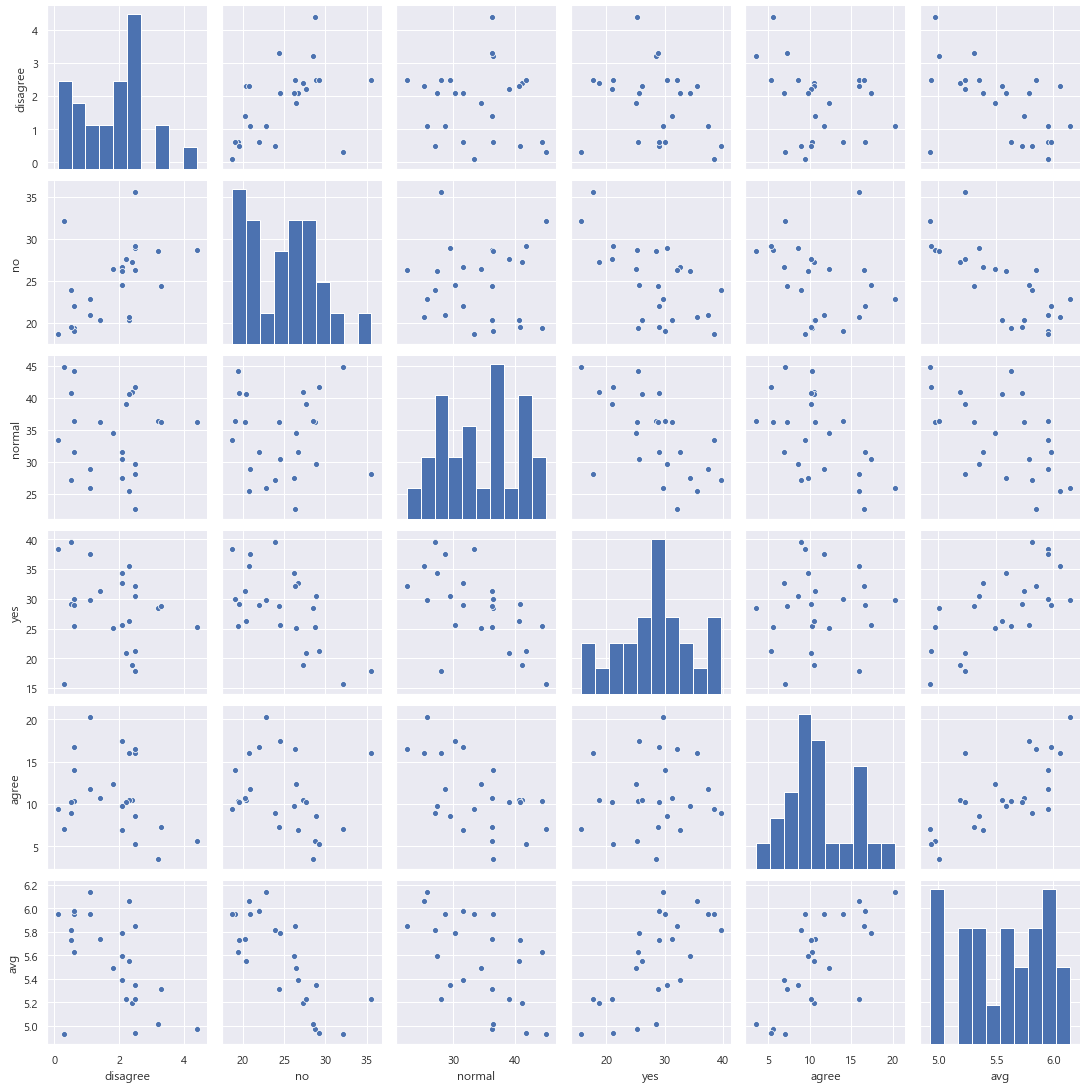

In [153]:
sns.pairplot(local) # 지역별 통계
plt.show()